# Project 2
## Exploratory Data Analysis

### Initial examination

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import patsy

%matplotlib inline


In [2]:
df = pd.read_csv('merged_final_df_clean.csv')

In [3]:
len(df)

799

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                799 non-null    object 
 1   dom_distributor            791 non-null    object 
 2   budget                     427 non-null    float64
 3   mpaa                       611 non-null    object 
 4   running_time               781 non-null    float64
 5   genres                     799 non-null    object 
 6   cast_link_stub             799 non-null    object 
 7   china_total_gross          799 non-null    float64
 8   domestic_toal_gross        799 non-null    float64
 9   international_total_gross  799 non-null    float64
 10  china_opening_sales        408 non-null    float64
 11  domestic_opening_sales     769 non-null    float64
 12  china_release_date         789 non-null    object 
 13  dom_release_date           797 non-null    object 

### Initial cleaning
Let's chop the rows with no director, no cast, and release dates.

We can impute budget and running time where it is missing.

We won't be using gross opening, or distributor. 

MPAA rating we can hopefully leave as is since it will be one-hot encoded. 

In [6]:
df.dropna(subset=['director', 'principal_cast', 'dom_release_date', 'china_release_date'], inplace=True)

In [7]:
df.drop(columns=['domestic_opening_sales','china_opening_sales'], inplace=True)


### Examining relationship between domestic gross and chinese gross

Analysis is focused on prediction, but out of curiousity let's take a deeper look at the target while we form our hypothesis

In [8]:
# Movies that made more money in China than USA

len(df[df.china_total_gross > df.domestic_toal_gross])

294

In [9]:
# Movies that did better in China than USA & were released in countries other than US and China (have greater int'l audience)

len(df[(df.china_total_gross > df.domestic_toal_gross) & (df.china_total_gross != df.international_total_gross)].sort_values(by='domestic_toal_gross', ascending=False))

277

In [10]:
# Movies where international sales ONLY come from china

len(df[df.china_total_gross == df.international_total_gross])

19

In [11]:
# quick look at what these movies are

df[df.china_total_gross == df.international_total_gross].head()

,movie_title,dom_distributor,budget,mpaa,running_time,genres,cast_link_stub,china_total_gross,domestic_toal_gross,international_total_gross,china_release_date,dom_release_date,summary_link_stub,director,principal_cast
432,The Ark of Mr Chow,China Lion Film Distribution,NaN,NaN,106.0,['Comedy'],/title/tt4727756/credits/?ref_=bo_tt_tab#tabs,7840000.0,54075.0,7840000.0,2015-06-19,2015-06-19,/title/tt4727756/?ref_=bo_gr_ti,Yang Xiao,"Yuexin Wang, Dongyu Zhou, Honglei Sun, Zijian ..."
437,A Fool,China Lion Film Distribution,NaN,NaN,103.0,"['Comedy', 'Drama']",/title/tt3856504/credits/?ref_=bo_tt_tab#tabs,2059608.0,8212.0,2059608.0,2015-11-19,2015-11-27,/title/tt3856504/?ref_=bo_gr_ti,Jianbin Chen,"Xuebing Wang, Jianbin Chen, Kim Scar, Qinqin J..."
521,Phantom of the Theatre,Well Go USA Entertainment,NaN,NaN,103.0,"['Drama', 'Mystery', 'Romance', 'Thriller']",/title/tt5639650/credits/?ref_=bo_tt_tab#tabs,13482888.0,43955.0,13482888.0,2016-04-29,2016-05-06,/title/tt5639650/?ref_=bo_gr_ti,Wai-Man Yip,"Simon Yam, Gangshan Jing, Ruby Lin, Tony Yo-ni..."
534,Papa,Jampa Films,NaN,NaN,106.0,"['Comedy', 'Drama', 'Family']",/title/tt4694440/credits/?ref_=bo_tt_tab#tabs,1329356.0,26677.0,1329356.0,2016-03-18,2016-03-18,/title/tt4694440/?ref_=bo_gr_ti,Xiao Zheng,"Yu Xia, Zi Yang, David Wu, Zuer Song"
535,Kaili Blues,Grasshopper Film,NaN,NaN,113.0,"['Drama', 'Mystery']",/title/tt4613272/credits/?ref_=bo_tt_tab#tabs,903072.0,32164.0,903072.0,2016-07-15,2016-05-20,/title/tt4613272/?ref_=bo_gr_ti,Bi Gan,"Feiyang Luo, Yongzhong Chen, Linyan Liu, Yue Guo"


### Examining relationships for initial features

Running time and budget look like they have some connection to CN gross

Don't want to use opening or other gross figures since emphasis is on prediction

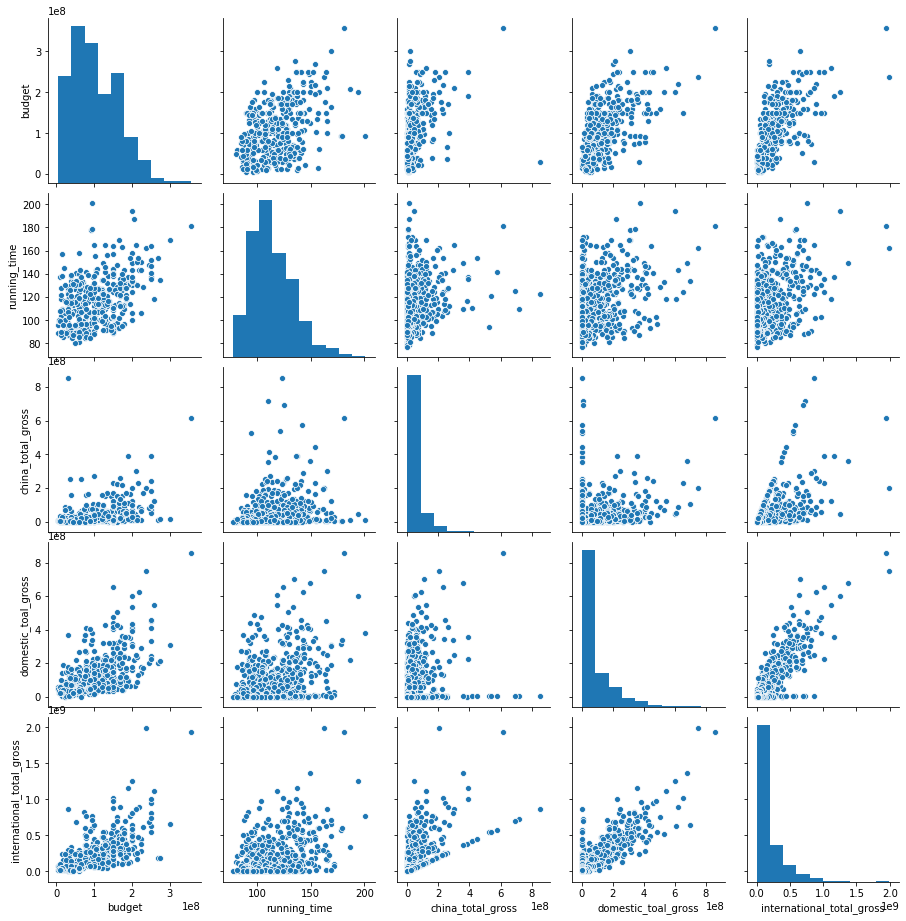

In [12]:
sns.pairplot(df)

### Traget variable distibution (CN GROSS)

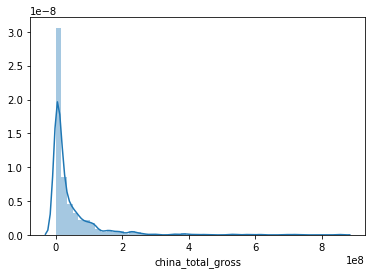

In [13]:
sns.distplot(df.china_total_gross)

Target var dist is heavily skewed to the right and has many outliers. 

Since the goal is to focus on predicting revenue, we will work with the dataset as is. Also, n is already somewhat small and I hesitate to shrink it any further for now. 

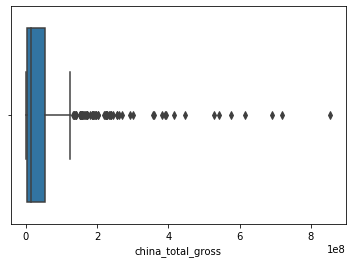

In [14]:
sns.boxplot(df.china_total_gross)

In [15]:
df.china_total_gross.median()

15485673.5

In [16]:
df.china_total_gross.max()

854248869.0

In [17]:
df.china_total_gross.describe()

count    7.860000e+02
mean     4.575705e+07
std      8.495692e+07
min      2.829000e+03
25%      3.374532e+06
50%      1.548567e+07
75%      5.266455e+07
max      8.542489e+08
Name: china_total_gross, dtype: float64

## Feature engineering

### Dummy variables for genre

In [18]:
df = pd.concat([df,pd.get_dummies(df['mpaa'], prefix='mpaa',dummy_na=True)],axis=1)

In [19]:
df.columns

Index(['movie_title', 'dom_distributor', 'budget', 'mpaa', 'running_time',
       'genres', 'cast_link_stub', 'china_total_gross', 'domestic_toal_gross',
       'international_total_gross', 'china_release_date', 'dom_release_date',
       'summary_link_stub', 'director', 'principal_cast', 'mpaa_G',
       'mpaa_NC-17', 'mpaa_Not Rated', 'mpaa_PG', 'mpaa_PG-13', 'mpaa_R',
       'mpaa_nan'],
      dtype='object')

### Adding columns for top director

All others will go into 'other'

In [20]:
# importing top directors list

director_df = pd.read_csv('director_df.csv')
director_df

,Name,Lifetime Gross
0,Steven Spielberg,10548456861
1,Russo brothers,6844248566
2,Peter Jackson,6546042615
3,Michael Bay,6443668117
4,James Cameron,6235731293
5,David Yates,6020939913
6,Christopher Nolan,4704255828
7,J. J. Abrams,4625988452
8,Tim Burton,4412653899
9,Jon Favreau,4333849545


In [21]:
# checking top director freq in df

for i in director_df.Name:
    icount = 0
    for j in df.director:
        if i == j:
            icount+=1
            print(i, '>>', j, icount)

Steven Spielberg >> Steven Spielberg 1
Steven Spielberg >> Steven Spielberg 2
Steven Spielberg >> Steven Spielberg 3
Steven Spielberg >> Steven Spielberg 4
Steven Spielberg >> Steven Spielberg 5
Peter Jackson >> Peter Jackson 1
Peter Jackson >> Peter Jackson 2
Peter Jackson >> Peter Jackson 3
Peter Jackson >> Peter Jackson 4
Peter Jackson >> Peter Jackson 5
Peter Jackson >> Peter Jackson 6
Peter Jackson >> Peter Jackson 7
Michael Bay >> Michael Bay 1
Michael Bay >> Michael Bay 2
Michael Bay >> Michael Bay 3
Michael Bay >> Michael Bay 4
Michael Bay >> Michael Bay 5
James Cameron >> James Cameron 1
James Cameron >> James Cameron 2
David Yates >> David Yates 1
David Yates >> David Yates 2
David Yates >> David Yates 3
David Yates >> David Yates 4
David Yates >> David Yates 5
David Yates >> David Yates 6
Christopher Nolan >> Christopher Nolan 1
Christopher Nolan >> Christopher Nolan 2
Christopher Nolan >> Christopher Nolan 3
Christopher Nolan >> Christopher Nolan 4
Christopher Nolan >> Chri

In [22]:
## JJ Abrams on list and in df but name mismatches

df[df.movie_title=='Star Trek'].director

167    J.J. Abrams
Name: director, dtype: object

In [23]:
# Same with russo bros

df[df.movie_title == 'Avengers: Endgame'].director

726    Anthony Russo
Name: director, dtype: object

In [24]:
director_df.at[1, "Name"] = 'Anthony Russo'
director_df.at[7, "Name"] = 'J.J. Abrams'
director_df

,Name,Lifetime Gross
0,Steven Spielberg,10548456861
1,Anthony Russo,6844248566
2,Peter Jackson,6546042615
3,Michael Bay,6443668117
4,James Cameron,6235731293
5,David Yates,6020939913
6,Christopher Nolan,4704255828
7,J.J. Abrams,4625988452
8,Tim Burton,4412653899
9,Jon Favreau,4333849545


In [25]:
# checking again to see if catch russo and abrams
# added counter for total number of top director films

total = 0

for i in director_df.Name:
    icount = 0
    for j in df.director:
        if i == j:
            icount+=1
            total+=1
            print(total, ". ", i, '>>', j, icount)

1 .  Steven Spielberg >> Steven Spielberg 1
2 .  Steven Spielberg >> Steven Spielberg 2
3 .  Steven Spielberg >> Steven Spielberg 3
4 .  Steven Spielberg >> Steven Spielberg 4
5 .  Steven Spielberg >> Steven Spielberg 5
6 .  Anthony Russo >> Anthony Russo 1
7 .  Anthony Russo >> Anthony Russo 2
8 .  Anthony Russo >> Anthony Russo 3
9 .  Anthony Russo >> Anthony Russo 4
10 .  Peter Jackson >> Peter Jackson 1
11 .  Peter Jackson >> Peter Jackson 2
12 .  Peter Jackson >> Peter Jackson 3
13 .  Peter Jackson >> Peter Jackson 4
14 .  Peter Jackson >> Peter Jackson 5
15 .  Peter Jackson >> Peter Jackson 6
16 .  Peter Jackson >> Peter Jackson 7
17 .  Michael Bay >> Michael Bay 1
18 .  Michael Bay >> Michael Bay 2
19 .  Michael Bay >> Michael Bay 3
20 .  Michael Bay >> Michael Bay 4
21 .  Michael Bay >> Michael Bay 5
22 .  James Cameron >> James Cameron 1
23 .  James Cameron >> James Cameron 2
24 .  David Yates >> David Yates 1
25 .  David Yates >> David Yates 2
26 .  David Yates >> David Yates

In [26]:
# looking at top 15 most common directors from df

df.director.value_counts().head(15)

Peter Jackson        7
Roland Emmerich      6
David Yates          6
Steven Spielberg     5
Yimou Zhang          5
Ang Lee              5
Christopher Nolan    5
Hark Tsui            5
Michael Bay          5
Zack Snyder          4
Anthony Russo        4
Jon M. Chu           4
Carlos Saldanha      4
Xiaogang Feng        4
Peter Berg           4
Name: director, dtype: int64

In [27]:
# making dict to map variables to 'other' if not top

convert_directors_dict = {}

for i in df.director.value_counts().index:
    i = str(i)
    for j in director_df.Name:
        j = str(j)
        if i == j:
            convert_directors_dict[i] = j
        else:
            pass

    if i not in convert_directors_dict.keys():
        convert_directors_dict[i] = 'Other'


In [28]:
# checking length to make sure all directors were captured

len(convert_directors_dict)

539

In [29]:
len(df.director.value_counts().index)

539

In [30]:
# mapping directors to only include top directors in new column

director_map = convert_directors_dict

df['top_director'] = df['director'].replace(director_map)

In [31]:
# checking that all directors were converted - Success

len(df[df.top_director != 'Other'])

43

In [32]:
# getting dummy variables

df = pd.concat([df,pd.get_dummies(df['top_director'], prefix='director',dummy_na=True)],axis=1)

### Examining release dates

In [33]:
# changing data type to datetime

df['china_release_date'] = df['china_release_date'].astype('datetime64[ns]') 

In [34]:
df['dom_release_date'] = df['dom_release_date'].astype('datetime64[ns]') 

In [35]:
df['release_date_diff'] = df['dom_release_date'] - df['china_release_date']

Pulling out column wiht just difference in release dates between CN and US (aka dom)

Not sure which will be better. I will try to make a colun for CN first and US first and check for correlation with revenue

In [36]:
# rows 797 and 798 look like mistakes. Let's drop those.

df['release_date_diff'].sort_values().dropna()

797   -7742 days
798   -7322 days
526    -847 days
627    -721 days
117    -710 days
         ...    
354     481 days
153     496 days
286     528 days
191     601 days
126     842 days
Name: release_date_diff, Length: 786, dtype: timedelta64[ns]

In [37]:
df.loc[797:798]

,movie_title,dom_distributor,budget,mpaa,running_time,genres,cast_link_stub,china_total_gross,domestic_toal_gross,international_total_gross,...,director_J.J. Abrams,director_James Cameron,director_Jon Favreau,director_Michael Bay,director_Other,director_Peter Jackson,director_Steven Spielberg,director_Tim Burton,director_nan,release_date_diff
797,Life Is Beautiful,Miramax,NaN,PG-13,116.0,"['Comedy', 'Drama', 'Romance', 'War']",/title/tt0118799/credits/?ref_=bo_tt_tab#tabs,8238491.0,57247384.0,171600000.0,...,0,0,0,0,1,0,0,0,0,-7742 days
798,The Legend of 1900,Fine Line Features,NaN,R,169.0,"['Drama', 'Music', 'Romance']",/title/tt0120731/credits/?ref_=bo_tt_tab#tabs,20511281.0,167435.0,20803216.0,...,0,0,0,0,1,0,0,0,0,-7322 days


In [38]:
# bye, felicia

df.drop(index=[797, 798], inplace=True)

In [39]:
# converting to float

df['release_date_diff'] = df['release_date_diff'].dt.days

In [40]:
df['release_date_diff'].head()

0    -89
1    -92
2      0
3      0
4   -406
Name: release_date_diff, dtype: int64

In [41]:
# freq released in CN first

len(df[df.release_date_diff >= 0])

299

In [42]:
# freq released in US first

len(df[df.release_date_diff < 0])

485

In [43]:
# freq released at same time or nan -- INCLUDE IN CN FIRST
# we care about whether CN had to wait or not for this metric since predictions are from CN perspective

len(df[df.release_date_diff == 0])

117

In [44]:
# setting variables for us and cn first (neither will be nan)

cn_first = list(df[df.release_date_diff >= 0].movie_title.value_counts().index) # incl. same date, measure of whether US got first or not
us_first = list(df[df.release_date_diff < 0].movie_title.value_counts().index)
all_release = df.movie_title.value_counts().index

In [45]:
# making dict to map variables to CN or US first

convert_release_date_dict = {}

for i in all_release:
    if i in cn_first:
        convert_release_date_dict[i] = 'CN_first'
    elif i in us_first:
        convert_release_date_dict[i] = 'US_first'
    else:
        pass

In [46]:
# mapping releases to only include specify us or cn first

release_map = convert_release_date_dict

df['release_order'] = df['movie_title'].replace(release_map)

In [47]:
# getting dummy variables

df = pd.concat([df,pd.get_dummies(df['release_order'], prefix='release_order',dummy_na=True)],axis=1)

In [48]:
df['release_order'].head()

0    US_first
1    US_first
2    CN_first
3    CN_first
4    US_first
Name: release_order, dtype: object

### STARPOWER COEFFICIENT

This is a list of the top 100 actors in terms of int'l box office revenue

In [49]:
actor_df = pd.read_csv('actor_df.csv', index_col='actor_name')

Idea: create a column with each film's **'starpower coefficient'** that is the sum of avg film gross for each actor in that film.

Sum is chosen (for now) instead of mean to favor films with ensemble casts with multiple top actors

In [50]:
df.principal_cast.head()

0    Dougray Scott, Tom Cruise, Thandie Newton, Vin...
1    Connie Nielsen, Oliver Reed, Russell Crowe, Jo...
2              Li Yuan, Julian Chen, Andy Lau, Li Gong
3    Naomi Scott, Elizabeth Banks, Kristen Stewart,...
4    Rachel McAdams, Jake Gyllenhaal, Oona Laurence...
Name: principal_cast, dtype: object

In [51]:
# extracting actors in each film into a list with each cast as a list item

principals = [] 

for row in df.principal_cast:

    if row:
        principals.append(row)
    else:
        principals.append(np.nan)


In [52]:
per_movie_dict = actor_df.per_movie.to_dict()

In [53]:
# iterating through the list of film casts, generating film 'star power' aka combined value of each major actor's avg per movie box office gross


star_power_sum = []
star_power_mean = []
top_100_star_count = []

for row in principals:                 # iterating through the list of film casts

    film_val = 0                       # combined cast value (sum of per movie gross for each actor) for each film
    actor_counter = 0
    
    clean_row = str(row).split(',') 
   
    
    for name in clean_row:              # iterating through sublist (indiv film cast)
        clean_name = name.strip()
        
        if clean_name in per_movie_dict.keys():       # matching actor names in each film to dict of top int'l actors
            film_val += per_movie_dict[clean_name]    # adding actor's mean box office gross to film_val
            actor_counter += 1                        # counting number of stars in each film 
            
    star_power_sum.append(film_val)     # adding total film val for all actors in film to list
    
    if actor_counter > 0:
        mean_film_val  = film_val / actor_counter     # generating mean film val
        star_power_mean.append(round(mean_film_val))  # adding to list
    else:
        star_power_mean.append(0)                     # adding 0 if no stars in film 
    
    top_100_star_count.append(actor_counter)          # counting num stars in film 
      

In [54]:
# adding columns for each new feature

In [55]:
df['star_count'] = top_100_star_count

In [56]:
df['star_power_mean'] = star_power_mean

In [57]:
df['star_power_sum'] = star_power_sum

### SEASONALITY

Examine relationship between past CN Gross figures and time of year released in CN

Build in some kind of seasonality coefficient

In [58]:
df['release_month'] = pd.DatetimeIndex(df['china_release_date']).month
df['release_month']

0       8
1       8
2       2
3      11
4       9
       ..
792     3
793     9
794     3
795    12
796     1
Name: release_month, Length: 784, dtype: int64

In [59]:
# since it may not make total sense just to express it as a scale of 1-12, pulling out dummy variables

In [60]:
df = pd.concat([df,pd.get_dummies(df['release_month'], prefix='release_month',dummy_na=True)],axis=1)

# Genre

In [61]:
df.genres

0      ['Action', 'Adventure', 'Thriller']
1         ['Action', 'Adventure', 'Drama']
2          ['Comedy', 'Romance', 'Sci-Fi']
3        ['Action', 'Adventure', 'Comedy']
4             ['Action', 'Drama', 'Sport']
                      ...                 
792                              ['Drama']
793                    ['Comedy', 'Drama']
794                 ['Action', 'Thriller']
795    ['Action', 'Adventure', 'Thriller']
796    ['Action', 'Adventure', 'Thriller']
Name: genres, Length: 784, dtype: object

In [62]:
test_genre = df.genres.iloc[0]

In [63]:
test_genre.replace(']', '').replace('[', '').replace('\'', '').split(',')

['Action', ' Adventure', ' Thriller']

In [64]:
genres_list = [] 

for row in df.genres:

    if row:
        genres_list.append(row)
    else:
        genres_list.append(np.nan)


In [65]:
# iterating through the list of film genres, cleaning strings and generating master 'all_genres' list


genre_types = []
genres_master_list = []

for row in genres_list:                 # iterating through the list of film genres
    single_film_genres = []
    
    clean_row = str(row).split(',') 
    
    for name in clean_row:              # iterating through sublist (indiv film cast)
        clean_name = name.replace(']', '').replace('[', '').replace('\'', '').strip()    # cleaning string
        single_film_genres.append(clean_name)      # adding to new cleaned list to turn into a Df column
        
        if clean_name not in genre_types:
            genre_types.append(clean_name)    # adding to a master list to iterate through when making dummy vars

    genres_master_list.append(single_film_genres)        

In [66]:
df['cleaned_genres'] = genres_master_list

In [67]:
len(genre_types)

22

In [68]:
for IT_GENRE in genre_types:
    df[IT_GENRE] = df.apply(lambda x: IT_GENRE in x['cleaned_genres'], axis=1).astype(int)

### Running time


In [69]:
# a handful of nans

df.running_time.isnull().value_counts()

False    767
True      17
Name: running_time, dtype: int64

In [70]:
# std is low, let's go with mean to impute nans

df.running_time.describe()

count    767.000000
mean     114.079531
std       19.651073
min       77.000000
25%       99.000000
50%      111.000000
75%      126.000000
max      201.000000
Name: running_time, dtype: float64

In [71]:
# imputing nans with mean

df.running_time = df.running_time.fillna(df.running_time.mean())

In [72]:
# all gone

df.running_time.isnull().value_counts()

False    784
Name: running_time, dtype: int64

### Budget

Budget has lots of missing values. Let's do a regression to approximate those values.  

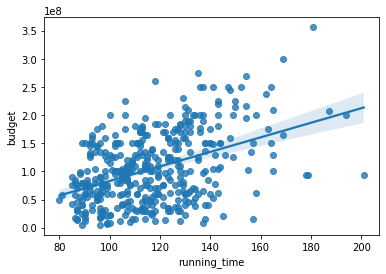

In [73]:
sns.regplot(df.running_time, df.budget)

Budget and running time have moderate correlation so we will scale budget to running time

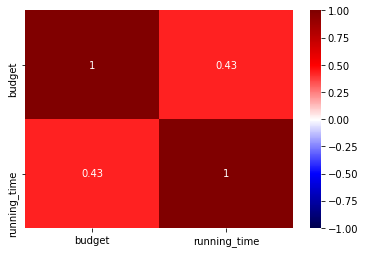

In [74]:
sns.heatmap(df[[ 
             'budget', 
             'running_time',
             ]].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [75]:
# creating subset to model

mini_model_df = df[(df.budget.notnull()) & (df.running_time.notnull())]
len(mini_model_df)

419

In [76]:
# checking nulls

len(mini_model_df[mini_model_df.running_time.isnull()])

0

In [77]:
len(mini_model_df[mini_model_df.budget.isnull()])

0

No nulls for budget or running_time now in this subset of the df. we will use this for modeling budget for null rows

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split


X = mini_model_df.loc[:,"running_time"].values.reshape(-1,1)
y = mini_model_df.loc[:,"budget"]

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, random_state=17)
X_train, y_train = np.array(X_train), np.array(y_train)

lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_train, y_train)

0.1702833034986444

In [79]:
lm.score(X_holdout, y_holdout)

0.2503144575197206

Not great r2. Let's try to add a polynomial term

In [80]:
pd.set_option('mode.chained_assignment', None)

mini_model_df['running_time^2'] = mini_model_df.running_time**2

In [81]:
mini_model_df[['running_time','running_time^2']].head()

,running_time,running_time^2
0,123.0,15129.0
1,155.0,24025.0
3,118.0,13924.0
4,124.0,15376.0
5,178.0,31684.0


Imputing values based on model

In [82]:
X, y = mini_model_df[['running_time', 'running_time^2']], mini_model_df['budget']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, random_state=17)
X_train, y_train = np.array(X_train), np.array(y_train)

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

lm1.score(X_train, y_train)


0.17038243294045397

In [83]:
lm1.score(X_holdout, y_holdout)

0.24924438725224973

Running time squared doesn't seem to help the model, but let's leave it for now and also see if adding any additional terms improves the score

In [84]:
X, y = mini_model_df[['running_time', 'running_time^2', 'Action',
       'Adventure', 'Thriller', 'Drama', 'Comedy', 'Romance', 'Sci-Fi',
       'Sport', 'Fantasy', 'Animation', 'Family', 'Musical', 'Mystery',
       'Biography', 'Crime', 'History', 'War', 'Horror', 'Western', 'Music',
       'Documentary', 'Reality-TV']], mini_model_df['budget']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, random_state=17)
X_train, y_train = np.array(X_train), np.array(y_train)

lm2 = LinearRegression()
lm2.fit(X_train, y_train)

lm2.score(X_train, y_train)

0.5477773264646162

In [85]:
lm2.score(X_holdout, y_holdout)

0.5637439862762925

Genre helps a TON

In [86]:
X, y = mini_model_df[['running_time^2','running_time','star_power_mean']], mini_model_df['budget']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, random_state=17)
X_train, y_train = np.array(X_train), np.array(y_train)

lm3 = LinearRegression()
lm3.fit(X_train, y_train)

lm3.score(X_train, y_train)

0.19877537007111046

In [87]:
lm3.score(X_holdout, y_holdout)

0.3077287958520624

Star power (mean) helps a little too.

In [88]:
X, y = mini_model_df[['running_time', 'running_time^2',  'international_total_gross']], mini_model_df['budget']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, random_state=17)
X_train, y_train = np.array(X_train), np.array(y_train)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)

lm4.score(X_train, y_train)

0.45276273306250403

In [89]:
lm4.score(X_holdout, y_holdout)

0.5169127783423308

Int'l gross helps significantly. OK to use since we don't need to predict budget here, just imputing values, cut

In [90]:
# THIS IS THE FINAL MODEL

X, y = mini_model_df[['running_time', 'running_time^2','domestic_toal_gross','star_power_mean', 'international_total_gross']], mini_model_df['budget']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, random_state=17)
X_train, y_train = np.array(X_train), np.array(y_train)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)

lm5.score(X_train, y_train)

0.4624153651270796

In [91]:
lm5.score(X_holdout, y_holdout)

0.5063803950666168

domestic gross isn't super helpful.

In [92]:
X, y = mini_model_df[['running_time','running_time^2', 'domestic_toal_gross','star_power_mean', 'international_total_gross','Action',
       'Adventure', 'Thriller', 'Drama', 'Comedy', 'Romance', 'Sci-Fi',
       'Sport', 'Fantasy', 'Animation', 'Family', 'Musical', 'Mystery',
       'Biography', 'Crime', 'History', 'War', 'Horror', 'Western', 'Music',
       'Documentary', 'Reality-TV']], mini_model_df['budget']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, random_state=17)
X_train, y_train = np.array(X_train), np.array(y_train)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)

lm5.score(X_train, y_train)

0.6560547069014675

In [93]:
lm5.score(X_holdout, y_holdout)

0.6760905860986766

In [94]:
# define mae calculator

test_set_pred = lm5.predict(X_holdout)


def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

# calculate MAE for lm5

mae(y_holdout, test_set_pred)


25779893.223711602

all together now, looks pretty decent. let's try regularization since there are so many features. 

In [95]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler(X_train)
m2 = LassoCV()
m2.fit(X_train,y_train)
m2.score(X_train,y_train)

0.40986246764808576

In [96]:
m2.score(X_holdout, y_holdout)

0.4305548821785379

regularization brings down the r2 too much. let's try polynomial while were at it just in case. 

In [97]:
X_train_scaled = StandardScaler(X_train)
m3 = LassoCV()
p = PolynomialFeatures(degree=2)
m3.fit(p.fit_transform(X_train),y_train)
m3.score(p.transform(X_train),y_train)

0.280084177408637

In [98]:
m3.score(p.transform(X_holdout), y_holdout)

0.27098938125018857

the polynomial features don't help either. looks like lm5 was best!

Time to impute the values using the model

In [99]:
# first let's add running time squared to the actual data frame

df['running_time^2'] = df.running_time**2

In [100]:
# the function that will return budget nan estimates

def get_budget_val(row):
    '''
    Takes a row and grabs values from from one row of a df and feeds them to a model to predict budget for that row. 
    Returns predicted budget for a row.
    Use to impute budget on rows where budget is null.
    '''
    
    if np.isnan(row.budget): 
            
        val1 = row['running_time']
        val2 = row['running_time^2']
        val3 = row['domestic_toal_gross']
        val4 = row['star_power_mean']
        val5 = row['international_total_gross']
        val6 = row['Action']
        val7 = row['Adventure']
        val8 = row['Thriller']
        val9 = row['Drama']
        val10 = row['Comedy']
        val11 = row['Romance']
        val12 = row['Sci-Fi']
        val13 = row[ 'Sport']
        val14 = row['Fantasy']
        val15 = row['Animation']
        val16 = row['Family']
        val17 = row['Musical']
        val18 = row['Mystery']
        val19 = row['Biography']
        val20 = row['Crime']
        val21 = row['History']
        val22 = row['War']
        val23 = row['Horror']
        val24 = row['Western']
        val25 = row['Music']
        val26 = row['Documentary']
        val27 = row['Reality-TV']
    
        budget_val = lm5.predict([[val1, val2, val3, val4, val5, val6, val7, val8, val9, val10, val11, val12, val13, val14, val15, val16, val17, val18, val19, val20, val21, val22, val23, val24, val25, val26, val27]])
        row.budget = budget_val  
        return int(budget_val)
        
    else:
        return int(row.budget)
    

In [101]:
# applying the function to a new column that will have all budget that previously existed PLUS new budget estimates for null values

df['budget_clean'] = df.apply(lambda row: get_budget_val(row), axis=1)

In [102]:
# what it looks like 

df[['budget','budget_clean']].tail()

,budget,budget_clean
792,NaN,32754758
793,NaN,27525849
794,NaN,49740393
795,90000000.0,90000000
796,80000000.0,80000000


In [103]:
df[['budget','budget_clean']].describe()

,budget,budget_clean
count,4.190000e+02,7.840000e+02
mean,1.044620e+08,8.623471e+07
std,6.209550e+07,5.611295e+07
min,4.800000e+06,-2.437307e+07
25%,5.750000e+07,4.650033e+07
50%,9.900000e+07,7.336977e+07
75%,1.500000e+08,1.172072e+08
max,3.560000e+08,3.560000e+08


Looks like there are some negative budget values now... let's take a deeper look

In [104]:
# 4 films with projected budgets below zero...

df[df['budget_clean'] <= 0]

,movie_title,dom_distributor,budget,mpaa,running_time,genres,cast_link_stub,china_total_gross,domestic_toal_gross,international_total_gross,...,Mystery,History,War,Horror,Western,Music,Documentary,Reality-TV,running_time^2,budget_clean
95,The Valet,Sony Pictures Classics,NaN,PG-13,85.0,"['Comedy', 'Drama']",/title/tt0449851/credits/?ref_=bo_tt_tab#tabs,87685.0,1926800.0,27487753.0,...,0,0,0,0,0,0,0,0,7225.0,-10990953
352,Begin Again,The Weinstein Company,NaN,R,104.0,"['Comedy', 'Drama', 'Music', 'Romance']",/title/tt1980929/credits/?ref_=bo_tt_tab#tabs,3220000.0,16170632.0,47294229.0,...,0,0,0,0,0,1,0,0,10816.0,-5400069
613,Suburbicon,Paramount Pictures,NaN,R,105.0,"['Comedy', 'Crime', 'Drama', 'Mystery', 'Thril...",/title/tt0491175/credits/?ref_=bo_tt_tab#tabs,880805.0,5775178.0,6976489.0,...,1,0,0,0,0,0,0,0,11025.0,-17397986
724,Have a Nice Day,Strand Releasing,NaN,NaN,77.0,"['Animation', 'Comedy', 'Crime', 'Drama']",/title/tt6451304/credits/?ref_=bo_tt_tab#tabs,409431.0,79393.0,424610.0,...,0,0,0,0,0,0,0,0,5929.0,-24373069


In [105]:
# just to check other outputs, making sure there are no other low predictions

df[df['budget_clean'] <= 1000000]

,movie_title,dom_distributor,budget,mpaa,running_time,genres,cast_link_stub,china_total_gross,domestic_toal_gross,international_total_gross,...,Mystery,History,War,Horror,Western,Music,Documentary,Reality-TV,running_time^2,budget_clean
95,The Valet,Sony Pictures Classics,NaN,PG-13,85.0,"['Comedy', 'Drama']",/title/tt0449851/credits/?ref_=bo_tt_tab#tabs,87685.0,1926800.0,27487753.0,...,0,0,0,0,0,0,0,0,7225.0,-10990953
352,Begin Again,The Weinstein Company,NaN,R,104.0,"['Comedy', 'Drama', 'Music', 'Romance']",/title/tt1980929/credits/?ref_=bo_tt_tab#tabs,3220000.0,16170632.0,47294229.0,...,0,0,0,0,0,1,0,0,10816.0,-5400069
613,Suburbicon,Paramount Pictures,NaN,R,105.0,"['Comedy', 'Crime', 'Drama', 'Mystery', 'Thril...",/title/tt0491175/credits/?ref_=bo_tt_tab#tabs,880805.0,5775178.0,6976489.0,...,1,0,0,0,0,0,0,0,11025.0,-17397986
724,Have a Nice Day,Strand Releasing,NaN,NaN,77.0,"['Animation', 'Comedy', 'Crime', 'Drama']",/title/tt6451304/credits/?ref_=bo_tt_tab#tabs,409431.0,79393.0,424610.0,...,0,0,0,0,0,0,0,0,5929.0,-24373069


In [106]:
# dropping problematic rows

df = df.drop(index=[95,352,613,724])

In [107]:
# all gone

df[df['budget_clean'] <= 1000000]

,movie_title,dom_distributor,budget,mpaa,running_time,genres,cast_link_stub,china_total_gross,domestic_toal_gross,international_total_gross,...,Mystery,History,War,Horror,Western,Music,Documentary,Reality-TV,running_time^2,budget_clean


''

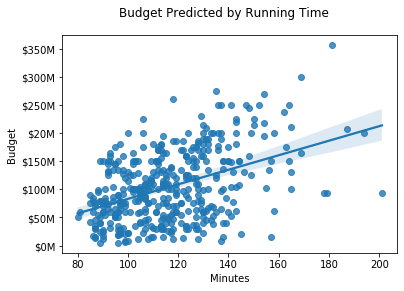

In [108]:
sns.regplot(df['running_time'], df.budget)
plt.yticks(np.linspace(0,350000000,8), ['$0M','$50M','$100M','$150M','$20M','$250M','$300M','$350M'])
plt.ylabel('Budget');
plt.xlabel('Minutes')
plt.suptitle('Budget Predicted by Running Time')
plt.savefig('budget_vs_running_time.svg')
;


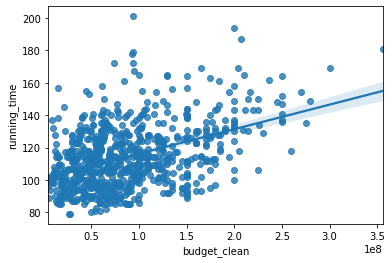

In [109]:
sns.regplot(df.budget_clean, df['running_time'])


### Dropping unnecessary features

In [110]:
# there are rows we don't need to include in the model here. let's make a new df with only rows we still care about. 

df.columns

Index(['movie_title', 'dom_distributor', 'budget', 'mpaa', 'running_time',
       'genres', 'cast_link_stub', 'china_total_gross', 'domestic_toal_gross',
       'international_total_gross', 'china_release_date', 'dom_release_date',
       'summary_link_stub', 'director', 'principal_cast', 'mpaa_G',
       'mpaa_NC-17', 'mpaa_Not Rated', 'mpaa_PG', 'mpaa_PG-13', 'mpaa_R',
       'mpaa_nan', 'top_director', 'director_Anthony Russo',
       'director_Christopher Nolan', 'director_David Yates',
       'director_J.J. Abrams', 'director_James Cameron',
       'director_Jon Favreau', 'director_Michael Bay', 'director_Other',
       'director_Peter Jackson', 'director_Steven Spielberg',
       'director_Tim Burton', 'director_nan', 'release_date_diff',
       'release_order', 'release_order_CN_first', 'release_order_US_first',
       'release_order_nan', 'star_count', 'star_power_mean', 'star_power_sum',
       'release_month', 'release_month_1.0', 'release_month_2.0',
       'release_month_3.

In [111]:
# new df with ONLY features that might be incorporated into model 

model_df=df[['movie_title',
             'china_total_gross', 
             'budget_clean', 
             'running_time',
             'running_time^2',
             'star_count', 
             'star_power_mean', 
             'star_power_sum',
             'release_month',
             'mpaa_G',
             'mpaa_NC-17', 
             'mpaa_Not Rated', 
             'mpaa_PG', 
             'mpaa_PG-13', 
             'mpaa_R', 
             'director_Anthony Russo',
             'director_Christopher Nolan', 
             'director_David Yates',
             'director_J.J. Abrams', 
             'director_James Cameron',
             'director_Jon Favreau', 
             'director_Michael Bay', 
             'director_Peter Jackson', 
             'director_Steven Spielberg',
             'director_Tim Burton', 
             'director_Other',
             'release_date_diff',
             'release_order_CN_first', 
             'release_order_US_first',
             'release_month_1.0', 
             'release_month_2.0',
             'release_month_3.0',
             'release_month_4.0', 
             'release_month_5.0',
             'release_month_6.0', 
             'release_month_7.0', 
             'release_month_8.0',
             'release_month_9.0', 
             'release_month_10.0', 
             'release_month_11.0',
             'release_month_12.0',
             'Action',
             'Adventure', 
             'Thriller', 
             'Drama', 
             'Comedy', 
             'Romance', 
             'Sci-Fi',
             'Sport', 
             'Fantasy', 
             'Animation', 
             'Family', 
             'Musical', 
             'Mystery',
             'Biography', 
             'Crime', 
             'History', 
             'War', 
             'Horror', 
             'Western', 
             'Music',
             'Documentary', 
             'Reality-TV'
             ]]

### Examining relationship of some newly engineered features

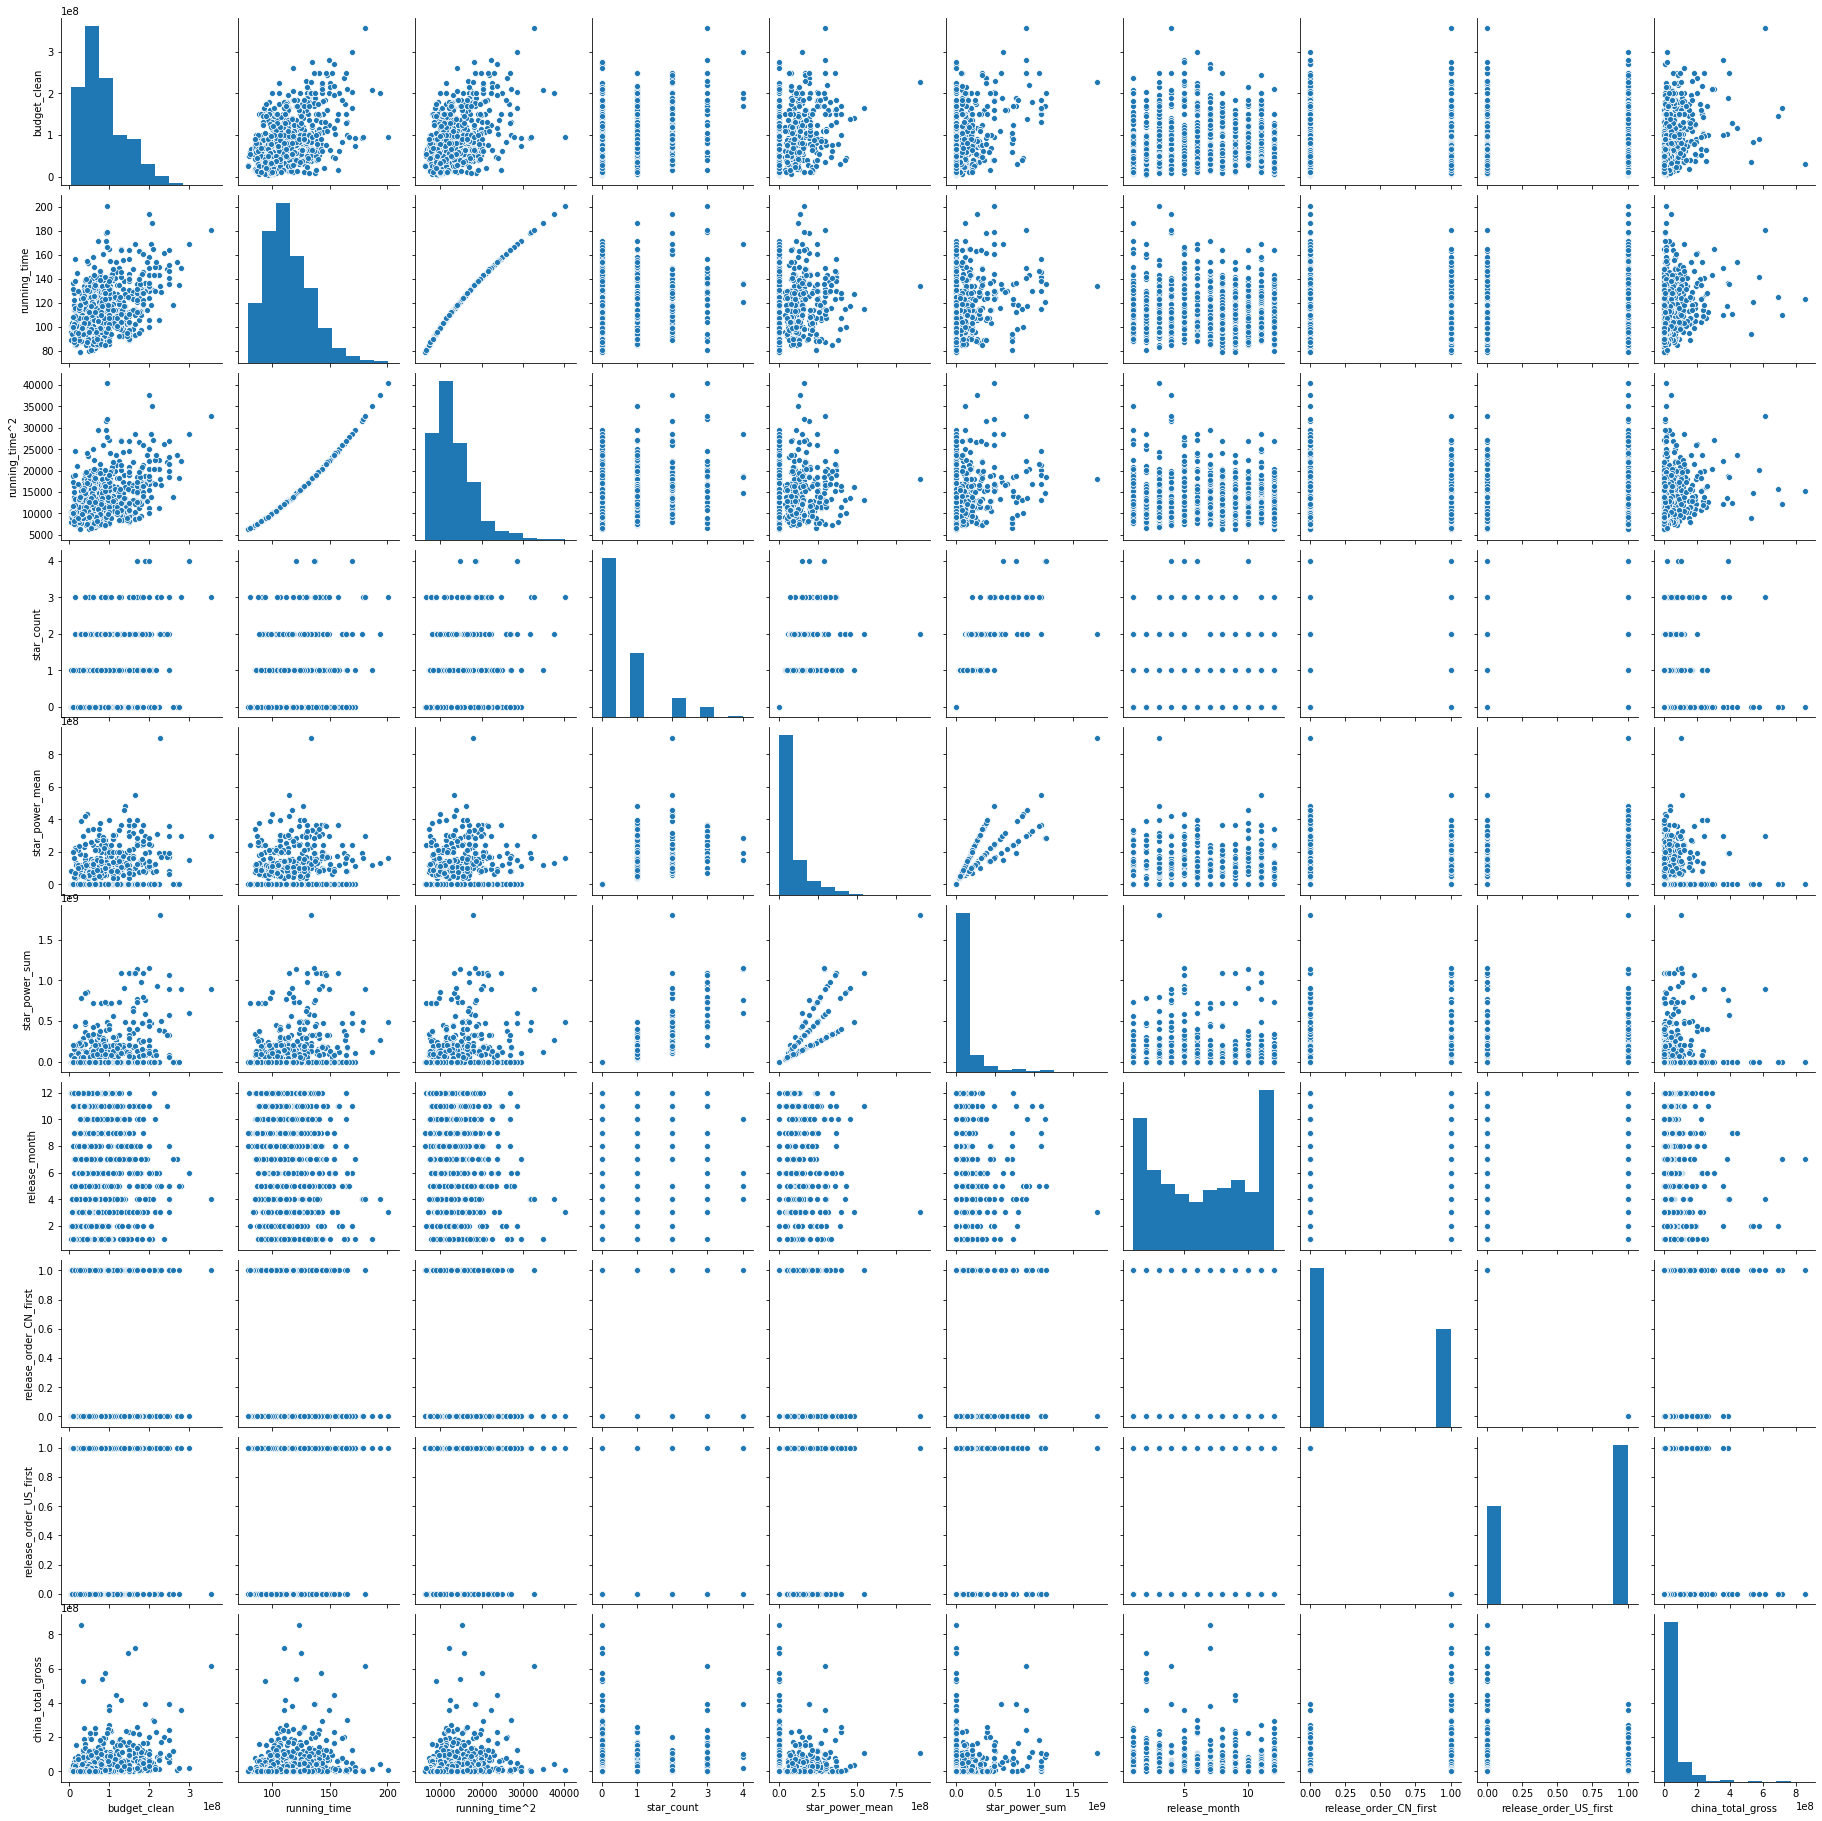

In [112]:
sns.pairplot(df[[ 
             'budget_clean', 
             'running_time','running_time^2',
             'star_count', 
             'star_power_mean', 
             'star_power_sum',
             'release_month',
    'release_order_CN_first', 
    'release_order_US_first',
    'china_total_gross']])

In [113]:
# writing the model df to a csv

model_df.to_csv('model_df.csv', index=False)

In [114]:
model_df.describe()

,china_total_gross,budget_clean,running_time,running_time^2,star_count,star_power_mean,star_power_sum,release_month,mpaa_G,mpaa_NC-17,...,Mystery,Biography,Crime,History,War,Horror,Western,Music,Documentary,Reality-TV
count,7.800000e+02,7.800000e+02,780.000000,780.000000,780.000000,7.800000e+02,7.800000e+02,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,4.606627e+07,8.675151e+07,114.188913,13415.246626,0.544872,6.021081e+07,9.708311e+07,6.607692,0.014103,0.001282,...,0.087179,0.053846,0.114103,0.051282,0.052564,0.029487,0.008974,0.024359,0.010256,0.001282
std,8.520754e+07,5.578672e+07,19.406743,4795.180732,0.836759,1.011286e+08,2.056083e+08,3.599664,0.117990,0.035806,...,0.282279,0.225859,0.318140,0.220714,0.223305,0.169276,0.094368,0.154260,0.100818,0.035806
min,2.829000e+03,4.800000e+06,79.000000,6241.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.397804e+06,4.725372e+07,99.000000,9801.000000,0.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.560741e+07,7.400000e+07,112.000000,12544.000000,0.000000,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.310539e+07,1.180397e+08,126.000000,15876.000000,1.000000,1.002673e+08,1.101869e+08,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.542489e+08,3.560000e+08,201.000000,40401.000000,4.000000,9.005776e+08,1.801155e+09,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
# top 10 features with best correlation

model_df.corr().sort_values(by='china_total_gross', ascending=False).head(10)

,china_total_gross,budget_clean,running_time,running_time^2,star_count,star_power_mean,star_power_sum,release_month,mpaa_G,mpaa_NC-17,...,Mystery,Biography,Crime,History,War,Horror,Western,Music,Documentary,Reality-TV
china_total_gross,1.000000,0.320735,0.215512,0.207222,0.070524,0.069327,0.127960,-0.066205,-0.042636,-0.012184,...,-0.027896,-0.067803,-0.046398,-0.003653,0.043056,-0.016934,-0.022105,-0.032490,-0.041114,0.009418
budget_clean,0.320735,1.000000,0.435574,0.437351,0.388551,0.353654,0.396385,-0.037756,0.022292,-0.046112,...,-0.093450,-0.201416,-0.171597,-0.009578,-0.069194,-0.126302,0.038523,-0.118142,-0.076480,-0.037050
release_order_CN_first,0.282224,0.004594,-0.008242,-0.023559,-0.165251,-0.132653,-0.081814,0.095284,0.062598,-0.028172,...,-0.046575,-0.117438,0.074670,0.032513,0.015795,-0.074667,0.009111,-0.038664,-0.001477,0.045567
director_Anthony Russo,0.228914,0.228005,0.144600,0.155087,0.210791,0.169459,0.279239,-0.042065,-0.008587,-0.002572,...,-0.022188,-0.017128,-0.025766,-0.016692,-0.016911,-0.012515,-0.006832,-0.011344,-0.007309,-0.002572
running_time,0.215512,0.435574,1.000000,0.993009,0.236281,0.185913,0.238661,-0.041875,-0.124501,0.079089,...,0.041766,0.059788,-0.034409,0.147307,0.161514,-0.098576,0.133656,-0.008400,-0.107280,-0.048381
release_date_diff,0.208792,0.155343,0.057287,0.046325,-0.041403,0.000624,0.009545,0.033170,0.049862,0.004889,...,-0.027283,-0.117720,0.038164,0.124941,0.043635,-0.026238,0.048238,-0.042014,-0.105926,0.013094
running_time^2,0.207222,0.437351,0.993009,1.000000,0.249658,0.189466,0.245760,-0.047341,-0.111779,0.083990,...,0.036450,0.050125,-0.044094,0.140398,0.153942,-0.094364,0.142107,-0.011766,-0.095088,-0.042402
Action,0.157783,0.303113,0.163996,0.148056,0.105590,0.128315,0.099767,-0.012053,-0.123656,-0.037044,...,-0.001213,-0.121619,0.113105,0.015508,0.020885,0.016935,0.037632,-0.146726,-0.079786,0.034654
star_power_sum,0.127960,0.396385,0.238661,0.245760,0.840500,0.879076,1.000000,-0.051541,-0.046772,-0.016928,...,0.099596,-0.026522,-0.048879,-0.046586,-0.054852,-0.044706,-0.002295,-0.065677,-0.048097,-0.016928
Adventure,0.125967,0.576642,0.030865,0.042314,0.196661,0.212460,0.220332,-0.047883,0.011793,-0.035554,...,0.002377,-0.179930,-0.202899,-0.079587,-0.107345,-0.006238,0.014327,-0.073634,-0.075567,-0.035554


In [116]:
# features with worst correlation

model_df.corr().sort_values(by='china_total_gross',ascending=False).tail(10)

,china_total_gross,budget_clean,running_time,running_time^2,star_count,star_power_mean,star_power_sum,release_month,mpaa_G,mpaa_NC-17,...,Mystery,Biography,Crime,History,War,Horror,Western,Music,Documentary,Reality-TV
Family,-0.051317,0.152141,-0.350602,-0.323679,-0.020235,-0.009325,-0.015628,0.006684,0.182712,-0.020615,...,-0.009597,-0.097842,-0.141195,-0.106880,-0.082365,-0.100292,-0.054753,0.005278,-0.029135,-0.020615
Drama,-0.058384,-0.341719,0.197100,0.187291,-0.137314,-0.135284,-0.127273,0.024850,-0.073828,0.044592,...,0.003007,0.238745,0.000699,0.229842,0.210793,-0.031401,0.034910,0.009302,-0.081791,-0.028787
release_month,-0.066205,-0.037756,-0.041875,-0.047341,-0.055519,-0.081282,-0.051541,1.000000,0.006998,0.043746,...,-0.002935,-0.048194,0.015598,0.049591,0.020896,-0.010485,0.002820,-0.061369,0.028788,-0.055851
Biography,-0.067803,-0.201416,0.059788,0.050125,-0.006009,0.005052,-0.026522,-0.048194,-0.028532,-0.008547,...,-0.033455,1.000000,0.057306,0.176296,0.147428,-0.041583,-0.022702,0.072839,0.032091,-0.008547
Animation,-0.079468,0.063530,-0.403568,-0.370055,-0.036194,-0.023004,-0.047728,0.022339,0.181861,-0.015875,...,-0.038763,-0.090365,-0.115464,-0.103014,-0.073341,-0.077232,-0.042164,0.042260,-0.045104,-0.015875
release_month_10.0,-0.079487,0.023372,-0.044877,-0.045962,-0.029794,0.009777,-0.002000,0.264777,0.008195,-0.010060,...,0.000537,-0.066983,-0.007806,-0.065280,0.000085,-0.019823,0.077748,-0.044366,-0.028583,-0.010060
mpaa_R,-0.087077,-0.207211,0.044531,0.038224,0.033646,-0.016857,-0.031875,-0.005385,-0.048204,-0.014441,...,0.019628,0.002142,0.180998,0.090697,0.120468,0.104610,0.040063,-0.039699,-0.041029,-0.014441
mpaa_PG,-0.113315,0.088714,-0.349097,-0.324427,-0.007666,0.000602,-0.029396,-0.039024,-0.059800,-0.017914,...,-0.040902,-0.048280,-0.149200,-0.116248,-0.103409,-0.087154,-0.013594,0.066531,-0.019087,-0.017914
director_Other,-0.126891,-0.380951,-0.376496,-0.403480,-0.252381,-0.208661,-0.256610,0.042365,0.028889,0.008654,...,0.014909,0.032736,0.069019,0.030691,0.031723,0.042103,0.022986,0.038167,0.024589,0.008654
release_order_US_first,-0.282224,-0.004594,0.008242,0.023559,0.165251,0.132653,0.081814,-0.095284,-0.062598,0.028172,...,0.046575,0.117438,-0.074670,-0.032513,-0.015795,0.074667,-0.009111,0.038664,0.001477,-0.045567


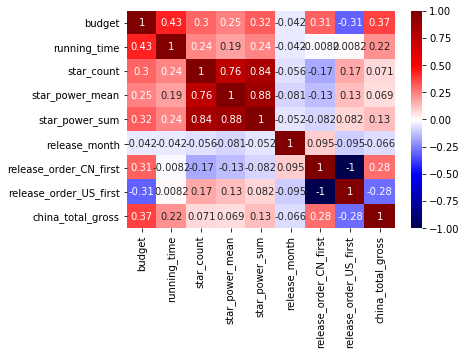

In [117]:
sns.heatmap(df[[ 
             'budget', 
             'running_time',
             'star_count', 
             'star_power_mean', 
             'star_power_sum',
             'release_month',
    'release_order_CN_first', 
    'release_order_US_first',
    'china_total_gross']].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

## Output for MVP testing

In [118]:
mvp_df = df[['china_total_gross', 
             'budget', 
             'running_time',
             'release_order_CN_first', 
             'star_power_sum'
             ]]

In [119]:
mvp_df = mvp_df.rename(columns={"release_order_CN first":"release_order_CN_first", "release_order_US first":"release_order_US_first"})

In [120]:
# dropping rows with no running_time FOR NOW

mvp_df.dropna(subset=['running_time'], inplace=True)

In [121]:
# dropping rows with no budget FOR NOW

mvp_df.dropna(subset=['budget'], inplace=True)

In [122]:
mvp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 796
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   china_total_gross       419 non-null    float64
 1   budget                  419 non-null    float64
 2   running_time            419 non-null    float64
 3   release_order_CN_first  419 non-null    uint8  
 4   star_power_sum          419 non-null    int64  
dtypes: float64(3), int64(1), uint8(1)
memory usage: 16.8 KB


In [123]:
mvp_df.describe()

,china_total_gross,budget,running_time,release_order_CN_first,star_power_sum
count,4.190000e+02,4.190000e+02,419.000000,419.00000,4.190000e+02
mean,4.329532e+07,1.044620e+08,116.566961,0.21957,1.482363e+08
std,7.539254e+07,6.209550e+07,20.733218,0.41445,2.286267e+08
min,7.439000e+03,4.800000e+06,80.000000,0.00000,0.000000e+00
25%,4.353352e+06,5.750000e+07,100.000000,0.00000,0.000000e+00
50%,1.701761e+07,9.900000e+07,114.000000,0.00000,7.576969e+07
75%,5.419098e+07,1.500000e+08,129.500000,0.00000,1.948388e+08
max,8.542489e+08,3.560000e+08,201.000000,1.00000,1.150001e+09


In [124]:
# writing the MVP df to a csv

mvp_df.to_csv('mvp_df.csv', index=False)

In [125]:
mvp_df.corr()

,china_total_gross,budget,running_time,release_order_CN_first,star_power_sum
china_total_gross,1.000000,0.372242,0.218525,0.317754,0.233584
budget,0.372242,1.000000,0.431437,0.307657,0.315056
running_time,0.218525,0.431437,1.000000,0.112177,0.225474
release_order_CN_first,0.317754,0.307657,0.112177,1.000000,0.160193
star_power_sum,0.233584,0.315056,0.225474,0.160193,1.000000


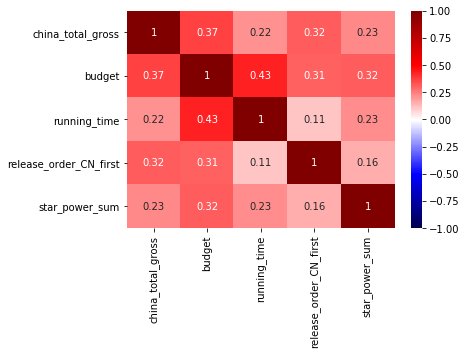

In [126]:
sns.heatmap(mvp_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.savefig('mvp_cor.png');

In [127]:

# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices("china_total_gross ~ budget + running_time + release_order_CN_first", data=mvp_df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      china_total_gross   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     32.24
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           9.48e-19
Time:                        17:35:08   Log-Likelihood:                -8150.1
No. Observations:                 419   AIC:                         1.631e+04
Df Residuals:                     415   BIC:                         1.632e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.251e+07   1.92e+07     -1.690      0.092   -7.03e+07     5.3e+06
budget                     0.3272      0.062      5.264      0.000       0.205       0.449
running_time            2.796e+05   1.78e+05      1.569      0.117   -7.08e+04     6.3e+05
release_order_CN_first  4.115e+07   8.45e+06      4.868      0.000    2.45e+07    5.78e+07
==============================================================================
Omnibus:                      500.947   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47996.876
Skew:                           5.459   Prob(JB):                         0.00
Kurtosis:                      54.284   Cond. No.                     7.02e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

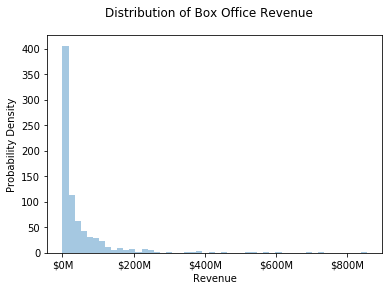

In [128]:
# Target var dist

sns.distplot(df.china_total_gross, kde=False)
plt.suptitle("Distribution of Box Office Revenue")
plt.xlabel("Revenue")
plt.ylabel("Probability Density")
plt.xticks(np.linspace(0,800000000,5), ['$0M','$200M','$400M','$600M','$800M'])
plt.savefig('mvp_dist.svg')


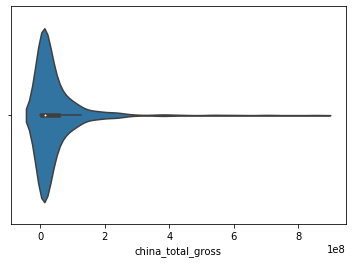

In [129]:
sns.violinplot(df.china_total_gross)

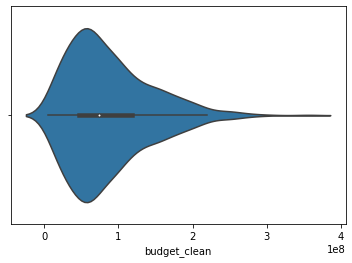

In [131]:
# budget dist

sns.violinplot(df.budget_clean)